In [1]:
#önemli kütüphaneler
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# PROJE 1: ABD Eyalet Segmentasyonu
# PROJE 2: RFM metrikler Göre unsupervised machine learning segmentation

In [2]:
df = pd.read_csv("./USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# Yukaridaki ile bu csv okuma isleminin farkina bakmak icin bu islemi yaptim. fark yok. ./ yi koymadanda aynisi oluyor.
df = pd.read_csv("USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


#####  Bazen bazi degiskenlerin ölceginin büyük olarak problemin icinde kalmasini ve probleme bunun bir agirlik faktörü gbi etki etmesini isteyebiliriz. Ilgili degiskenin(belirlediginiz) ölceginin etkisini veri setinde tutmak isteyebiliriz. Veya standartlastirip, sonra belirli bir katsayi ile carpabiliriz

In [7]:
#Robust Scaler ile dönüstürme
from sklearn.preprocessing import RobustScaler

In [8]:
# rs seklinde isimlendirebilir. Istedigimiz ismi verebiliriz
rs = RobustScaler()

In [9]:
# Robust scale ile dönüstürülmüs yeni df miz
df = rs.fit_transform(df)

- Yukarida görüldügü gibi robust scaler ile standartlastirma islemi yapildiginda negatif (- ile baslayan) rakamlar da cikiyor. Bu yapiyi biraz bozuyor. Mutlak alinsa da ayni sekilde bozabilir..
- Bu yüzden MinMaxScaler ile islem yapmak isimizi kolaylastirir. Cünkü burada uzaklik temelli islem yapiliyor ve eksi (-) degerler karisikliga sebebiyet verebilir.

In [10]:
# MinMaxScaler ile standartlastirma islemi

from sklearn.preprocessing import MinMaxScaler

In [11]:
# Standarlastirilmis tüm degerlerin 0 ile 1 arasinda olmasini istiyoruz

sc = MinMaxScaler((0,1))

In [12]:
df = sc.fit_transform(df)

In [13]:
df 

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

### K-Means 

In [14]:
# Yukarida belirttigimiz gibi n_clusters i basta biz belirliyoruz
# Istedigimiz makul bir sayi verebiliriz. Islem sonunda ideal clusstera ulasacagiz
# Burada modeli olusturuyoruz

kmeans = KMeans(n_clusters = 4)

In [15]:
kmeans

KMeans(n_clusters=4)

In [16]:
# kmeans i veri setine fit ediyoruz

k_fit = kmeans.fit(df)

In [17]:
k_fit

KMeans(n_clusters=4)

In [18]:
k_fit.n_clusters

4

In [19]:
# Her yeni calismada farkli sonuclar cikiyor
# Cluster larin labellari. 4 clusterimiz var. Bunlar 0, 1, 2 ve 3
k_fit.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

# Kümelerin Görselleştirilmesi

- Bunu görsellestirme örnegi olarak yapiyoruz. Yukaridaki islemin devami degil.


In [20]:
k_means = KMeans(n_clusters = 2).fit(df)

In [21]:
kumeler = k_means.labels_

In [22]:
kumeler

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [23]:
# Asagidaki islemde df miz numpy array e dönebiliyor. O yüzden onu tekrar pandas data framee dönüstürüyoruz
# numpy array olsaydi asagidaki görsellestirme codu hata verirdi

df = pd.DataFrame(df)

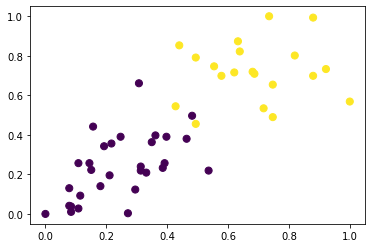

In [24]:
# Scater plot ile görsellestirme yapacagiz
# [:,0] df in icindeki bütün gözlem birimleri ve 1. degisken secimi icin
# [:,0] df in icindeki bütün gözlem birimleri ve 2. degisken secimi icin
# c isimli parametre kümeler parametremiz olacak. 0 ve 1 nolu kümeleri icin. 2 kümemiz var
# islemi iloc ile yapiyoruz. Bu pandas data frame ile kullanilir. Numpy array ile kullanilmaz
# Asagidaki islemi 3 küme ile yapabiliriz ancak 4 küme icin yapamayiz

plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");

In [25]:
# Clusterin merkezlerini bu görsellere yerlestirme islemi

merkezler = k_means.cluster_centers_

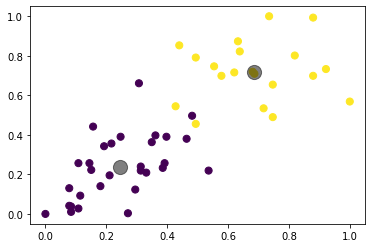

In [26]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha=0.5);

In [ ]:
# 20 degiskeni 2 boyutta göstermek isterseniz 'pca' ile yapabilirsiniz. Boyut indirgeme yapip bunu iki eksende göstermek istiyorsaniz, cluster sayisinin önemi yok. Veriyi iki boyuta indirgerseniz bu islemi yapabilirsiniz. 
# Bu temel bilesen analizinde olabilir (Principal Component Analysis)

# Optimum Küme Sayısının Belirlenmesi

In [27]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [28]:
?k_fit

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\toshiba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an initialization.

n_init : int, default=10
    Nu

In [29]:
# KÜME SAYISINI BELIRLEME
# Burada olmasi gereken cluster sayisini bulmak icin islemler yapacagiz
# ideal k sayisini 1 ile 30 arasinda arayacagiz. Bu sayi muhtemelen duruma göre degisebilir.
# Sonra herbir k degeri icin bir kmeans modeli kur
#Sonra fit et.
#sonra ssd nin icerisine bu kmeans nesnesi icerisinde yer alan inertia degerini at
# ssd sum of squared distances
# inertia_ : float
#Sum of squared distances of samples to their closest cluster center.


ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

In [30]:
# düsük olan ssd degeri iyidir

ssd

[13.18412255025645,
 6.596893867946199,
 5.01087849300642,
 3.683456153585915,
 3.1842618139677223,
 2.858072353835629,
 2.61523033032313,
 2.3240579857248087,
 2.1210146193494825,
 1.9084888229135109,
 1.696358298234152,
 1.5305333887463441,
 1.4004380053585999,
 1.2812904550489779,
 1.2299383161886412,
 1.0889206214173512,
 1.0565129679592289,
 1.0473659122726233,
 0.9437279517445093,
 0.8434766259721768,
 0.7610655167792616,
 0.755985376136911,
 0.7029036088039624,
 0.6509416944044191,
 0.618554758609829,
 0.55802354408319,
 0.48628855453014375,
 0.4394828077777626,
 0.3945431026685208]

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

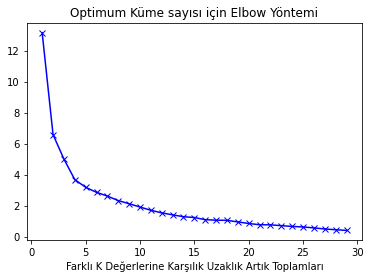

In [31]:
# Elbow yöntemi ile görsel üzerinden küme sayisi belirleme
# Egimin en hizli degistigi, dirseklendigi nokta küme sayisini gösterir


plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [32]:
# Yukaridaki islemde küme sayisini gözle belirliyorduk. Ancak asagidaki islem bize net sonuc veriyor
# Önce kütüphaneyi indirecegiz

!pip install yellowbrick

In [33]:
from yellowbrick.cluster import KElbowVisualizer

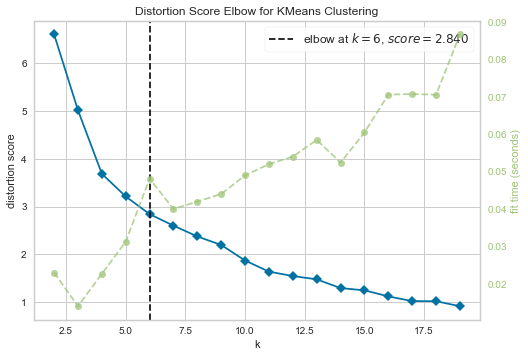

In [34]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof();

In [35]:
# Yukaridaki islem bize 6 küme önerdi
# Simdi Final kmeans modelini fit edecegiz. 

kmeans = KMeans(n_clusters = 6).fit(df)
kmeans

KMeans(n_clusters=6)

In [36]:
kumeler = kmeans.labels_

In [37]:
kumeler

array([2, 5, 0, 4, 5, 5, 3, 4, 0, 2, 3, 1, 0, 4, 1, 4, 4, 2, 1, 0, 3, 0,
       1, 2, 4, 1, 1, 5, 1, 3, 0, 0, 2, 1, 3, 4, 4, 3, 3, 2, 1, 2, 0, 3,
       1, 4, 4, 1, 1, 4])

In [ ]:
- Eyaletlerin hangi kümeler icinde yer aldigini görmek icin
- en bastaki orjinal df yi tekrar calistirip yeni ilslem yapacagiz.

In [38]:
df = pd.read_csv("./USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [39]:
# df in indexini alip ondan da eyaletleri alip kümelri onlarin yanina koyacagiz

pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,5
2,Arizona,0
3,Arkansas,4
4,California,5
5,Colorado,5
6,Connecticut,3
7,Delaware,4
8,Florida,0
9,Georgia,2


In [40]:
# Cluster numarasina göre yeni bir tablo yapma

df["cluster_no"] = kumeler

In [41]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,5


In [42]:
# ilk cluster a sifir yerine 1 demek icin her cluster a 1 ekleriz

df["cluster_no"] = df["cluster_no"] + 1

In [43]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,6
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,6


In [44]:
# Hangi clusterda kac gözlem birimi var

df.groupby("cluster_no").agg({"cluster_no":"count"})

,cluster_no
cluster_no,
1,8
2,12
3,7
4,8
5,11
6,4


In [45]:
# Örnegin 6. clusterdaki eyaletleri görmek istersek

df[df["cluster_no"] == 6]

,Murder,Assault,UrbanPop,Rape,cluster_no
Alaska,10.0,263,48,44.5,6
California,9.0,276,91,40.6,6
Colorado,7.9,204,78,38.7,6
Nevada,12.2,252,81,46.0,6


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0
cluster_no,50.0,3.280,1.616749,1.0,2.000,3.00,5.000,6.0


In [47]:
# Her grubun suclara göre ortalama degerleri

df.groupby("cluster_no").agg(np.mean)

,Murder,Assault,UrbanPop,Rape
cluster_no,,,,
1,11.562500,271.625000,77.500000,29.187500
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714
4,5.075000,123.000000,81.000000,16.737500
5,7.036364,155.909091,64.181818,20.963636
6,9.775000,248.750000,74.500000,42.450000


# Hiyerarşik Kümeleme Analizi
# Hierarchical Cluster Analysis

   



In [48]:
# Hierarchical Cluster Analysis
# Agglomerative (Birlestirici) Clustering Method

from scipy.cluster.hierarchy import linkage

In [49]:
?linkage

Signature: linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Docstring:
Perform hierarchical/agglomerative clustering.

The input y may be either a 1-D condensed distance matrix
or a 2-D array of observation vectors.

If y is a 1-D condensed distance matrix,
then y must be a :math:`\binom{n}{2}` sized
vector, where n is the number of original observations paired
in the distance matrix. The behavior of this function is very
similar to the MATLAB linkage function.

A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
:math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
cluster with an index less than :math:`n` corresponds to one of
the :math:`n` original observations. The distance between
clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
fourth value ``Z[i, 3]`` represents the number of original
observations in the newly formed cluster.

The following linkage methods are used to comp

In [50]:
# linkage yöntemi icerisinde complete ve average yöntemleri var
# Birlestirici dendogram olustiurma islemi yapacagiz

hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

In [51]:
# Dendogram fonksiyonu getirecegiz

from scipy.cluster.hierarchy import dendrogram

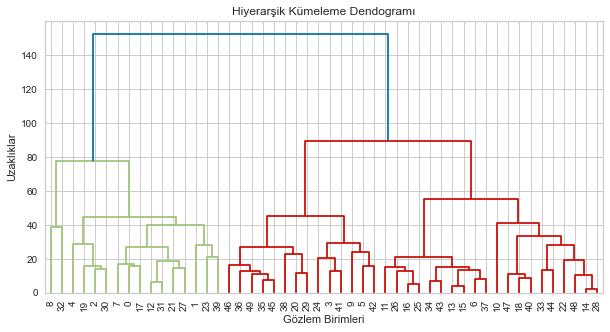

In [52]:
# leaf_font_size en altaki rakamlarin buyuklugunu gösteriyor. 
# figsize da seklin ölcülerini gösteriyor
# Burada average yöntemi kullandik

plt.figure(figsize = (10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          leaf_font_size = 10);

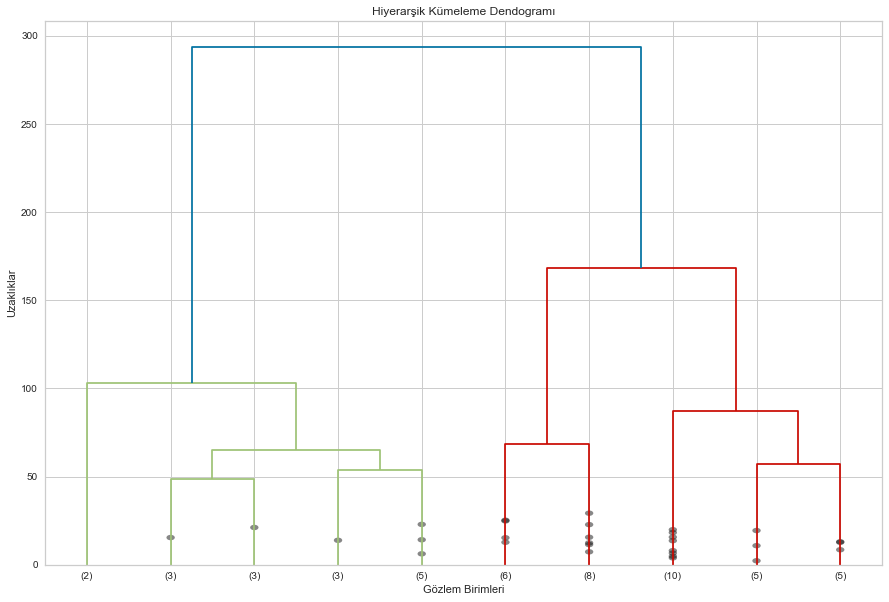

In [53]:
# burada complete yöntemi kullandik
# Yukarida gözlem birimi sayisi kadar küme var
# Örnegin sadece 10 tane cluster kalmasini istiyorsak 
# Dendogram kfonksiyonuna asagidaki sekilde özellik ekleriz. p= cluster sayisi

plt.figure(figsize = (15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
          leaf_font_size = 10);

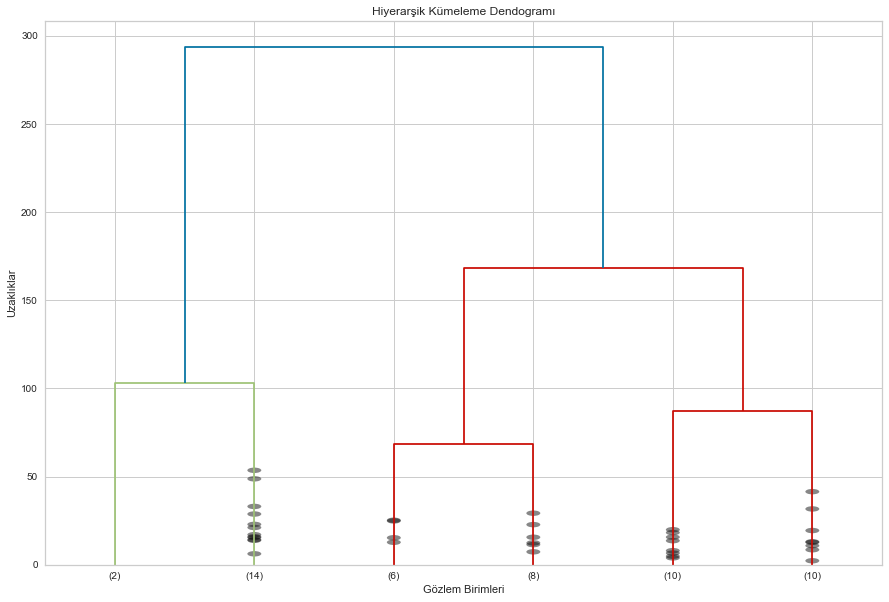

In [54]:
# yukaridaki islemi 6 cluster ile deneme
# burada complete yöntemi kullandik
# Yukarida gözlem birimi sayisi kadar küme var
# Örnegin sadece 6 tane cluster kalmasini istiyorsak 
# Dendogram kfonksiyonuna asagidaki sekilde özellik ekleriz. p= cluster sayisi

plt.figure(figsize = (15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 6,
           show_contracted = True,
          leaf_font_size = 10);

# Temel Bileşen Analizi
# (Principal Component Analysis)



In [59]:
# pca categorik degiskenleri sevmez bu yuzden hitters veri setinden sadece numeric data lari alacigiz
# get_numeric_data ile sadce numeric datalari allacagiz.

df = pd.read_csv("./Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [60]:
# pca icin robust yada normalized olmalisinin cok bir anlami yok.
# bu yüzden standart scaler ile standartlastirma yapacagiz

from sklearn.preprocessing import StandardScaler

In [61]:
# fit ile standartlastirma kaydedilecek

df = StandardScaler().fit_transform(df)

In [62]:
# dönüstürme islemi sonucunda data frame numpy array e döndü

df[0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292,
        -0.0975271 ,  1.3978935 ,  0.3467905 ,  0.1743734 , -0.0029198 ,
        -0.12167086,  0.25896561,  0.43533435,  1.22149851, -0.52319133,
         0.21335208, -0.1353126 ],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962,
         1.6093726 , -0.90120024, -0.45286539, -0.4098921 , -0.07605382,
        -0.41510491, -0.19959036,  0.010373  ,  2.10910888, -0.25386267,
         0.81996395, -0.12420791],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654,
        -0.18979195,  0.77086793,  1.30155773,  1.31817358,  1.89856469,
         1.41205144,  1.57266648,  0.3556541 , -0.32466148, -0.74417894,
        -0.84821868, -0.07978915],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498,
        -0.51271892, -1.11020876, -0.99093521, -0.96015272, -0.69769298,
        -0.94752134, -0.88122761, -0.86231547,  1.84067833, -0.54390892,
        -0.69656571

In [63]:
# Veri setimizde 17 degisken 263 case var
df.shape

(263, 17)

In [64]:
# sklearn icerisinden PCA fonksiyonunu import ediyoruz

from sklearn.decomposition import PCA

In [65]:
# n_component boyut sayisini ifade ediyor
# 5 yazinca veri setimizdeki 17 degiskeni 2 degiskene indirmis gibi oluyoruz
pca = PCA(n_components = 5)
pca_fit = pca.fit_transform(df)

In [66]:
pca_fit

array([[ 0.07684824,  1.65352465,  0.08822766,  1.46279093,  0.4694797 ],
       [ 0.33712679, -2.32055981, -0.69457082,  1.57514345,  0.31527879],
       [ 3.40836188,  0.75575651, -0.96993707, -1.1205432 ,  0.73293692],
       ...,
       [-1.20632164, -0.62571443,  0.25214952, -0.62359809, -1.42396615],
       [ 2.08485639, -2.05985085, -0.16640456,  3.35810448, -0.43859562],
       [ 1.97796295, -0.20809992, -0.26984563,  0.43253925, -1.05971425]])

In [67]:
# Her bir bilesinen 17 degiskenin tasidigi bilginin ne kadarini tasidigini görmek icin 

pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 , 0.0539344 , 0.04161435])

In [68]:
# Burada 1. sinde 1 bilesinen , ikisinde 2 bilesinin toplaminin, 3. sunde 3, bilesinin toplaminin vb
# 17 degiskenin tasidigi bilginin ne kadarini tasidigini görüyoruz
# Yukarida ayri ayri idi
# Mesale 3 bilesen 17 degiskenin yaklasik %80 ini (0.7966) acikliyor diyebiliriz

np.cumsum(pca.explained_variance_ratio_)

array([0.45245466, 0.69492267, 0.79661947, 0.85055387, 0.89216822])

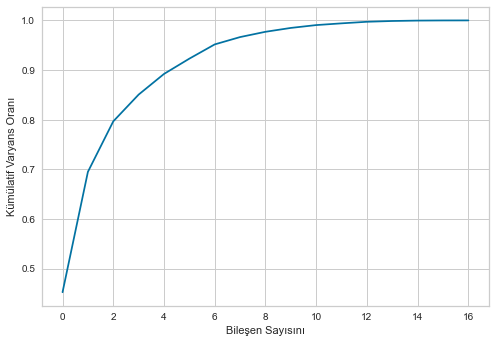

In [69]:
#optimum bilesen sayisi
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı");

In [70]:
#final 3 bilesenle bu isi yapabiliriz. Cünkü %80 ini acikliyor
# o yüzden 3 ile fit ediyoruz

pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [71]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])

In [72]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45245466, 0.69492267, 0.79661947])